In [461]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')


In [462]:
samsung_train=pd.read_csv('./samsung_HAR/samsung_train.txt',delim_whitespace=True, header=None)
samsung_train_labels=pd.read_csv('./samsung_HAR/samsung_train_labels.txt',delim_whitespace=True, header=None)
samsung_test=pd.read_csv('./samsung_HAR/samsung_test.txt',delim_whitespace=True, header=None)
samsung_test_labels=pd.read_csv('./samsung_HAR/samsung_test_labels.txt',delim_whitespace=True, header=None)

In [463]:
print('Train: ',samsung_train.shape,'\n\nTrain labels:', samsung_train_lables.shape )

Train:  (7352, 561) 

Train labels: (7352, 1)


In [464]:
print('Test: ',samsung_test.shape,'\n\nTest labels:', samsung_test_lables.shape )

Test:  (2947, 561) 

Test labels: (2947, 1)


In [532]:
samsung_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, 0 to 560
dtypes: float64(561)
memory usage: 31.5 MB


In [465]:
samsung_train.isnull().sum()


0      0
1      0
2      0
3      0
4      0
      ..
556    0
557    0
558    0
559    0
560    0
Length: 561, dtype: int64

In [466]:
samsung_train.head()

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [467]:

scalar=StandardScaler()
X_scaled=scalar.fit_transform(samsung_train)

In [468]:
X_scaled.shape

(7352, 561)

In [469]:
from sklearn.decomposition import PCA

In [470]:
pca=PCA(n_components=2)

In [471]:
X_pca=pca.fit_transform(X_scaled)

In [472]:
X_pca.shape

(7352, 2)

In [473]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=6)
km.fit(X_pca)

KMeans(n_clusters=6)

In [474]:
kmeans_per_k = [
    KMeans(n_clusters=k, random_state=2).fit(X_pca)
    for k in range(2, 20)
]

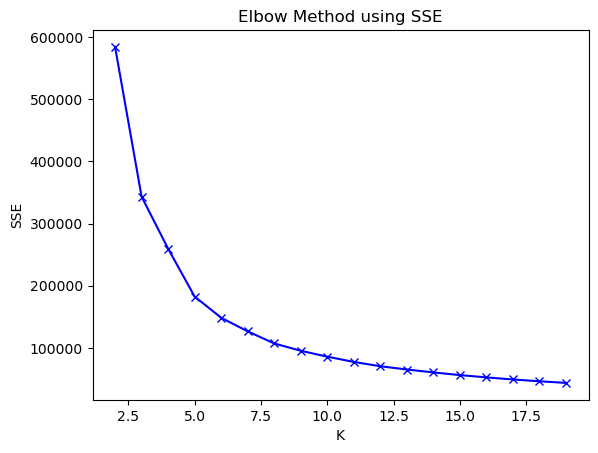

In [475]:
import matplotlib.pyplot as plt
inertias = [model.inertia_ for model in kmeans_per_k]
plt.plot(range(2, 20), inertias, 'bx-')
plt.xlabel('K')
plt.ylabel('SSE')
plt.title('Elbow Method using SSE')
plt.show()

In [476]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=3, linewidths=8,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(klasyfikator, X):
    # wyznaczanie granic decyzyjnych, podobnie jak w poprzednich notatnikach
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], 100),
                         np.linspace(mins[1], maxs[1], 100))
    Z = klasyfikator.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # rysowanie konturów granic 
    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    
    # rysowanie danych
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    # centra klastrów można wyciągnąc za pomocą zmiennej cluster_centers_
    plot_centroids(klasyfikator.cluster_centers_)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

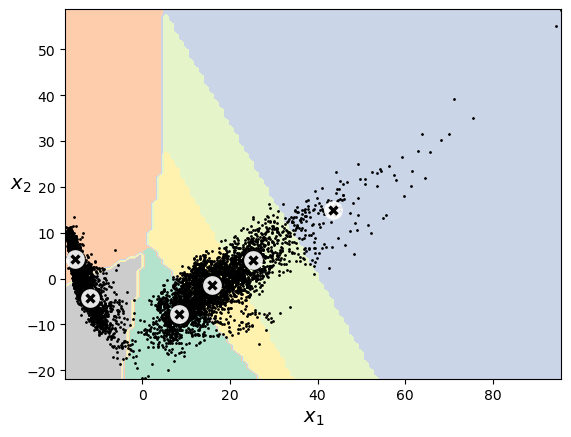

In [477]:
plot_decision_boundaries(km,X_pca)

In [478]:
dbscan = DBSCAN(eps=0.6, min_samples=3)
dbscan.fit(X_pca)

DBSCAN(eps=0.6, min_samples=3)

In [479]:
def plot_dbscan(dbscan, X, size):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired",alpha=0.5)
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask],alpha=0.5)
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100,alpha=0.2)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".",alpha=0.3)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

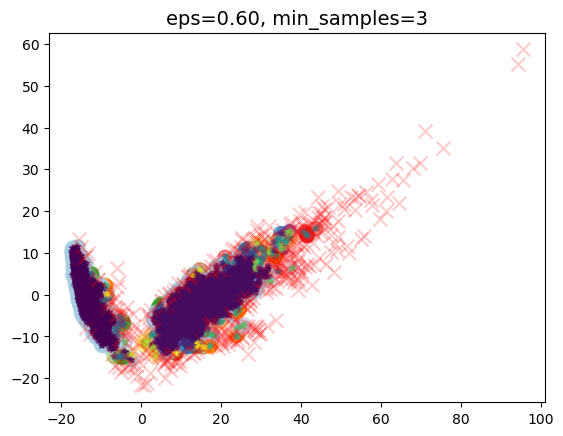

In [480]:
plot_dbscan(dbscan, X_pca, size=100)

In [481]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=6, n_init=10, random_state=42)
gm.fit(X_pca)

GaussianMixture(n_components=6, n_init=10, random_state=42)

In [482]:
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt

# metoda zaporzyczona z przykładów sklearn oraz lekko zmodyfikowana zmodyfikowana 
def plot_gaussian_mixture(clf, X, resolution=1000):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clf.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, linewidths=3, colors='b')
    
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

    plt.xlabel("$x_1$", fontsize=14)
    plt.tick_params(labelleft=False)

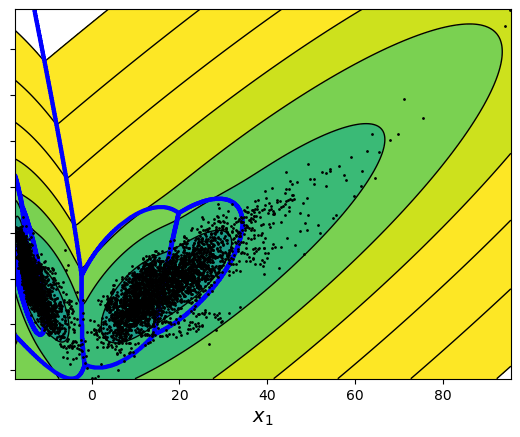

In [483]:
plot_gaussian_mixture(gm, X_pca, resolution=1000)

In [484]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [485]:
log_reg=LogisticRegression(max_iter=2000,multi_class='ovr')
log_reg.fit(samsung_train,samsung_train_labels)

LogisticRegression(max_iter=2000, multi_class='ovr')

In [486]:
print("Bez KMeans :", log_reg.score(samsung_test,samsung_test_labels))

Bez KMeans : 0.9613165931455717


In [487]:
pred=log_reg.predict(samsung_test)

In [488]:
from sklearn.metrics import confusion_matrix

In [489]:
print(confusion_matrix(samsung_test_labels, pred))

[[494   0   2   0   0   0]
 [ 26 445   0   0   0   0]
 [  4   9 407   0   0   0]
 [  0   4   0 432  55   0]
 [  2   0   0  12 518   0]
 [  0   0   0   0   0 537]]


In [490]:
from sklearn.tree import DecisionTreeClassifier

In [518]:
dt = DecisionTreeClassifier(random_state=42)

In [519]:
dt.fit(samsung_train,samsung_train_labels)

DecisionTreeClassifier(random_state=42)

In [520]:
dt_pred=dt.predict(samsung_test)

In [521]:
print("Bez KMeans :", dt.score(samsung_test,samsung_test_labels))

Bez KMeans : 0.8622327790973872


In [522]:
print(confusion_matrix(samsung_test_labels, dt_pred))

[[456  24  16   0   0   0]
 [ 74 369  28   0   0   0]
 [ 19  53 348   0   0   0]
 [  0   0   0 374 117   0]
 [  0   0   0  75 457   0]
 [  0   0   0   0   0 537]]


In [517]:
# pipelines logistic regression & KMeans

In [497]:
pipe=Pipeline([('kmeans',KMeans(
                n_clusters=20,
                random_state=50)),
               ('log_reg',LogisticRegression(multi_class='ovr',max_iter=4000,random_state=50))])

In [514]:
pipe.fit(samsung_train,samsung_train_labels)

Pipeline(steps=[('kmeans', KMeans(n_clusters=20, random_state=50)),
                ('log_reg',
                 LogisticRegression(max_iter=4000, multi_class='ovr',
                                    random_state=50))])

In [515]:
print("Logistic regression pipeline :", pipe.score(samsung_test, samsung_test_labels))

Logistic regression pipeline : 0.8937902952154734


In [523]:
pipe2=Pipeline([('kmeans',KMeans(
                n_clusters=20,
                random_state=50)),
               ('Decission Tree',DecisionTreeClassifier(random_state=42))])

In [528]:
pipe2.fit(samsung_train,samsung_train_labels)

Pipeline(steps=[('kmeans', KMeans(n_clusters=20, random_state=50)),
                ('Decission Tree', DecisionTreeClassifier(random_state=42))])

In [529]:
print("Decisiontre   pipeline :", pipe2.score(samsung_test, samsung_test_labels))

Decisiontre   pipeline : 0.7984390906006108
